<a href="https://colab.research.google.com/github/Udhay2898/Pandas_Tutorial_Code/blob/master/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
##################
### Line Chart ###
##################

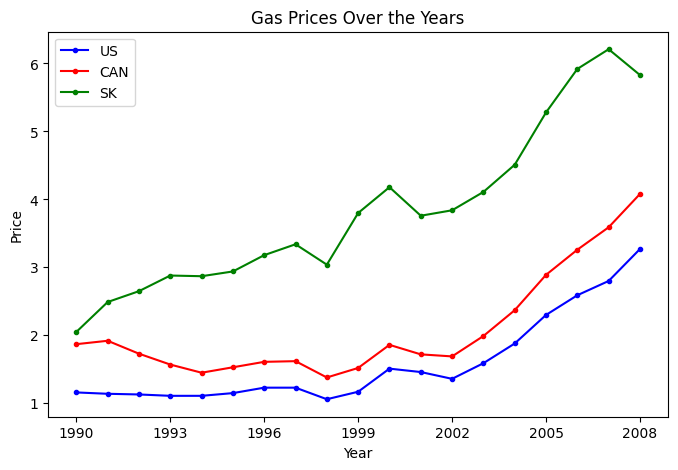

In [85]:
gas = pd.read_csv("/content/drive/MyDrive/Data Sets/gas_prices.csv")
gas.head()

plt.figure(figsize=(8,5))

plt.title('Gas Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Price')


plt.plot(gas.Year,gas.USA,'b.-',label = 'US')
plt.plot(gas.Year,gas.Canada,'r.-',label = 'CAN')
plt.plot(gas['Year'],gas['South Korea'],'g.-',label = 'SK')

plt.xticks(gas.Year[::3])


plt.legend()

plt.show()

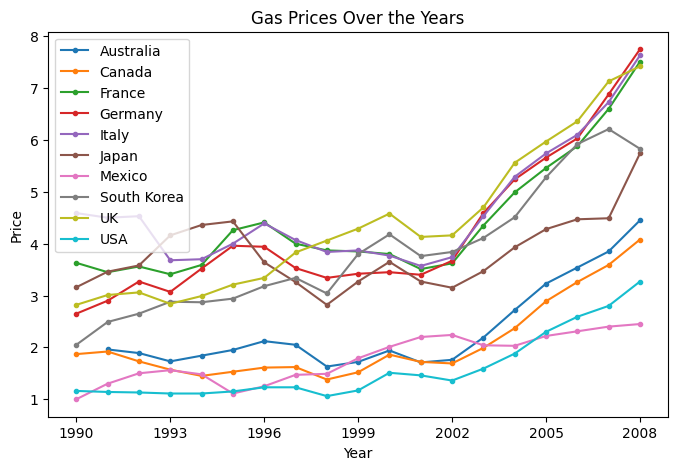

In [6]:
gas = pd.read_csv("/content/drive/MyDrive/Data Sets/gas_prices.csv")
gas.head()

plt.figure(figsize=(8,5))

plt.title('Gas Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Price')


for i in gas:
  if i  != 'Year':
    plt.plot(gas.Year,gas[i],marker ='.',label = i)

plt.xticks(gas.Year[::3])


plt.legend()

plt.show()

In [8]:
##################
### Histagram  ###
##################

In [9]:
fifa = pd.read_csv('/content/drive/MyDrive/Data Sets/fifa_data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [10]:
fifa.shape

(18207, 89)

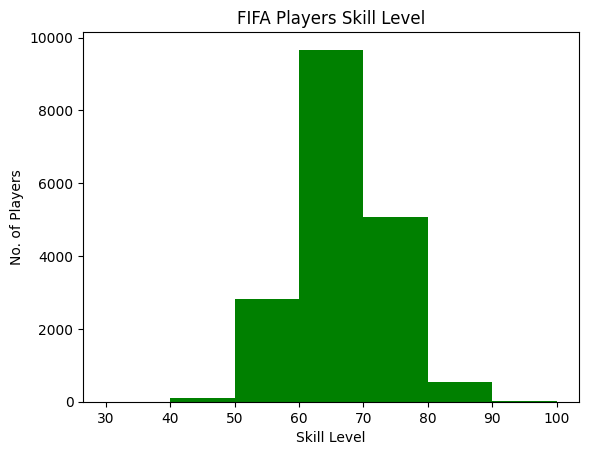

In [11]:
plt.title('FIFA Players Skill Level')
plt.xlabel('Skill Level')
plt.ylabel('No. of Players')

bins = [30,40,50,60,70,80,90,100]

plt.hist(fifa.Overall,bins=bins,color='green')

plt.xticks(bins)
plt.show()

In [12]:
#################
### Pie Chart ###
#################

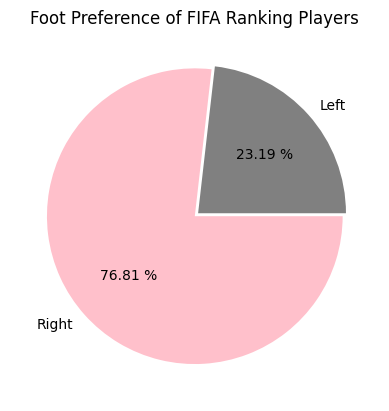

In [73]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

plt.title('Foot Preference of FIFA Ranking Players')

labels = ['Left','Right']
colors = ['gray','pink']
explode = [.03,0]

plt.pie([left, right],labels=labels,colors=colors,explode=explode,autopct='%.2f %%')
plt.show()

In [38]:
fifa.Weight

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [41]:
#To Separate the Strings and Number

fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

fifa.Weight[0]

159.0

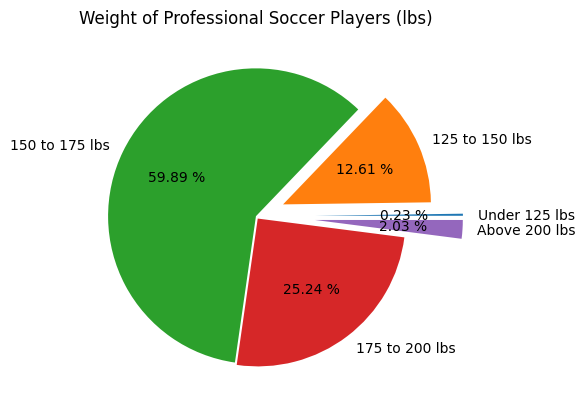

In [75]:
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium =fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium =fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy =fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >= 200].count()[0]

weights = [light,light_medium,medium,medium_heavy,heavy]
label = ['Under 125 lbs','125 to 150 lbs','150 to 175 lbs', '175 to 200 lbs','Above 200 lbs']
explode = (.4,.2,0,0.02,.4)

plt.title('Weight of Professional Soccer Players (lbs)')

plt.pie(weights, labels=label,explode=explode,autopct= '%.2f %%')
plt.show()


In [93]:
################
### Box Plot ###
################

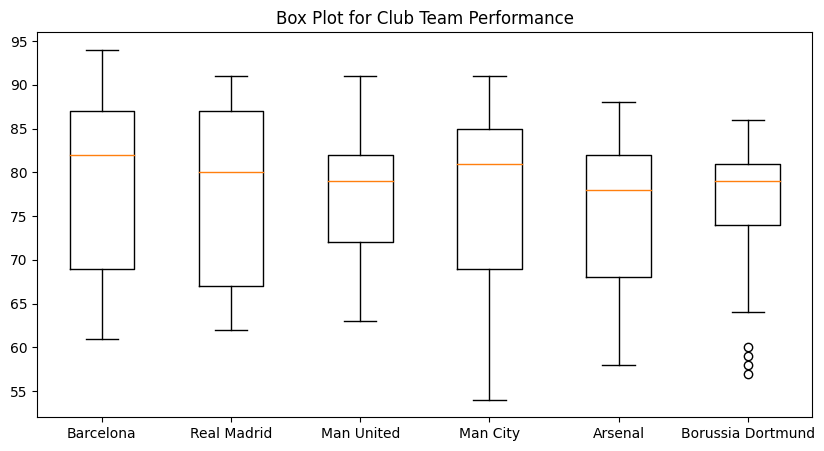

In [104]:
plt.figure(figsize=(10,5))

b_fc = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
rm_cf = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
mu_fc = fifa.loc[fifa.Club == 'Manchester United']['Overall']
mc_fc = fifa.loc[fifa.Club == 'Manchester City']['Overall']
a_fc =fifa.loc[fifa.Club == 'Arsenal']['Overall']
bvb =fifa.loc[fifa.Club == 'Borussia Dortmund']['Overall']

plt.title('Box Plot for Club Team Performance')
data = [b_fc,rm_cf,mu_fc,mc_fc,a_fc,bvb]
labels = ['Barcelona','Real Madrid','Man United','Man City','Arsenal','Borussia Dortmund']

plt.boxplot(data,labels=labels)
plt.show()